In [265]:
from matplotlib.colors import ListedColormap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

from sklearn import datasets
from sklearn.base import clone

np.random.seed(0)

%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

np.random.seed(0)

plt.style.use("fivethirtyeight")



In [266]:
diabetes = datasets.load_diabetes(as_frame=True)["frame"]
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


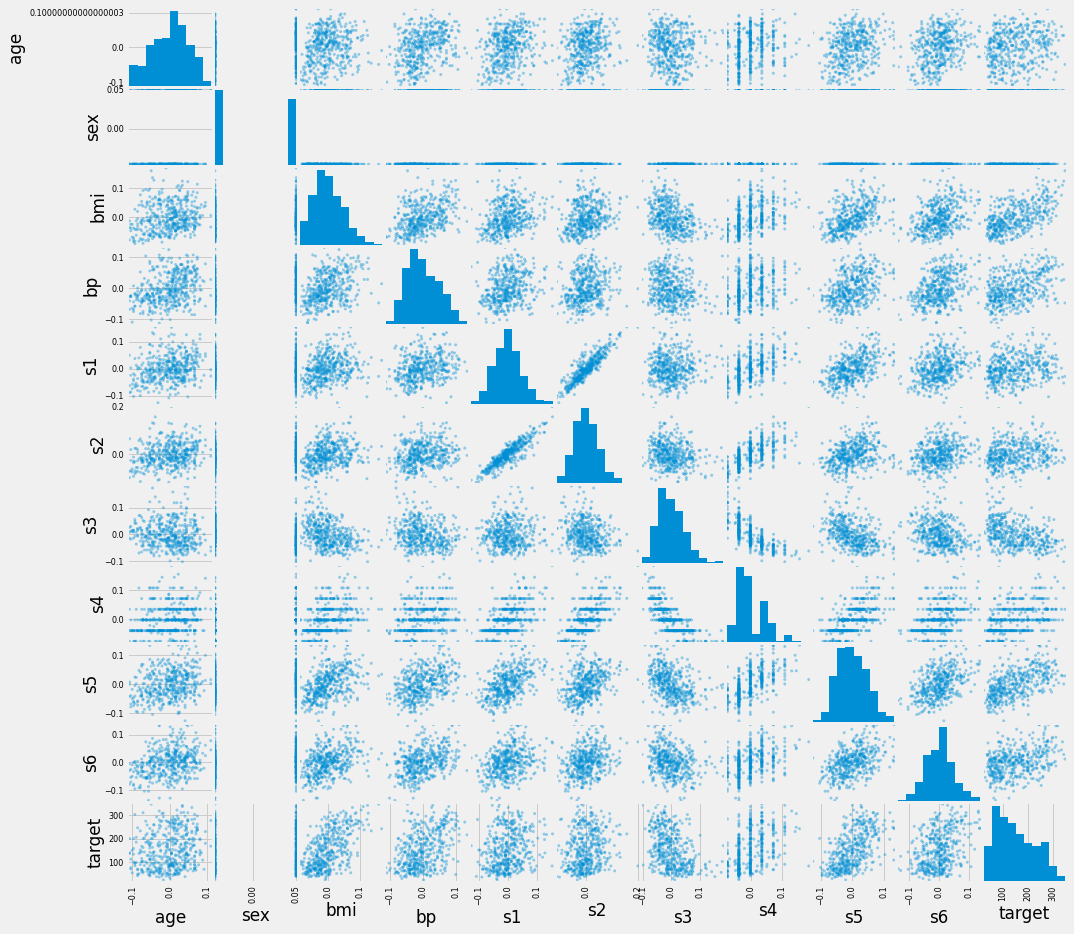

In [267]:
pd.plotting.scatter_matrix(diabetes,alpha=0.4,figsize=(15,15));

(array([24., 23., 47., 53., 55., 85., 69., 47., 33.,  6.]),
 array([-0.10722563, -0.0854304 , -0.06363517, -0.04183994, -0.02004471,
         0.00175052,  0.02354575,  0.04534098,  0.06713621,  0.08893144,
         0.11072668]),
 <BarContainer object of 10 artists>)

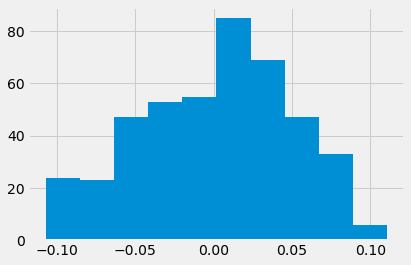

In [268]:
plt.hist(diabetes["age"])

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-0.0902753 , -0.06419224, -0.03810919, -0.01202614,  0.01405691,
         0.04013997,  0.06622302,  0.09230607,  0.11838912,  0.14447217,
         0.17055523]),
 <BarContainer object of 10 artists>)

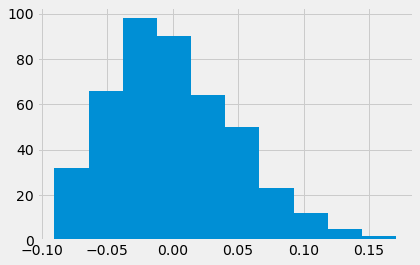

In [269]:
plt.hist(diabetes["bmi"])

In [270]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-3.634285e-16,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.308343e-16,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-8.045349e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,1.281655e-16,0.047619,-0.112400,-0.036656,-0.005671,0.035644,0.132044
s1,442.0,-8.835316e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,1.327024e-16,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-4.574646e-16,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,3.777301e-16,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,-3.830854e-16,0.047619,-0.126097,-0.033249,-0.001948,0.032433,0.133599
s6,442.0,-3.412882e-16,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [271]:
y = diabetes["target"]
X = diabetes.drop(["target"],axis=1)


In [272]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [273]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [274]:
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=True,test_size=.3,random_state=40)

In [275]:
rg=Ridge(alpha=0.5)
rg.fit(X_train,y_train)
y_pred = rg.predict(X_test)
y_pred

array([110.05188391, 169.38726463, 180.18105206, 185.03247077,
       161.91361891, 210.56959707, 154.38691172, 111.17385345,
       161.64746999, 135.25542908, 168.27476078, 118.56594687,
        76.14472038, 169.89704295,  83.75599977, 163.14213631,
       141.77068967, 134.88079309,  96.6435275 , 137.58284736,
        88.74401509, 215.15316724, 136.95258401, 129.43704544,
        91.51924386, 168.08161955, 144.21912424, 116.57766622,
       179.11034673,  92.84340691, 152.91528709, 153.16490225,
       128.72152524, 166.40104066,  98.90357105,  80.27345222,
       121.66195652, 101.20031669, 195.97981626, 143.92057455,
       149.6925968 ,  91.84273284, 156.28562883, 157.75494222,
       197.34786556, 140.25053396, 107.48425058, 156.42739204,
       124.14326315, 227.33238695, 198.98111415, 169.18201848,
       207.25296583, 198.98477225, 146.13294939, 181.82601784,
       135.20003142, 143.02155028, 125.77618021, 156.28836289,
       162.78134035,  77.71193328, 186.23160926, 179.95

In [276]:
y_mse=mean_squared_error(y_test,y_pred)
y_mse

3655.045787392184

In [277]:
r2 = r2_score(y_test,y_pred)
r2

0.4072010484349502

In [278]:
n_folds = 5
random_seed = 0
kf = KFold(n_splits = n_folds, random_state = random_seed,shuffle=True)
test_cv_errors,train_cv_errors = np.empty(n_folds),np.empty(n_folds)

X_train2 = np.array(X_train)
y_train2 = np.array(y_train)


for j,(t_index,v_index) in enumerate (kf.split(X_train2)):
    X_tr = X_train2[t_index]
    y_tr = y_train2[t_index]
    X_v  = X_train2[v_index]
    y_v  = y_train2[v_index]
    
    rg = Ridge(alpha=0.5)
    rg.fit(X_tr,y_tr)

    #Train
    y_tr_pred = rg.predict(X_tr)
    mse1 = mean_squared_error(y_tr,y_tr_pred)
    train_cv_errors[j]=mse1
    
    #Test
    y_v_pred = rg.predict(X_v)
    mse2 = mean_squared_error(y_v,y_v_pred)
    test_cv_errors[j]=mse2

In [279]:
train_cv_errors

array([2966.49090389, 2911.85109045, 3004.54407349, 2760.9208334 ,
       3064.54651289])

In [280]:
test_cv_errors

array([3214.0775263 , 3220.25505986, 2591.88178737, 3737.0190202 ,
       2471.10292047])

In [281]:
def cv(X,y,estimator,folds,seed=154):
    X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=True,test_size=0.33,random_state=seed)
    
    kf = KFold(n_splits = n_folds,random_state=seed, shuffle=True)
    test_cv_errors,train_cv_errors = np.empty(n_folds),np.empty(n_folds)

    X_train2 = np.array(X_train)
    y_train2 = np.array(y_train)


    for j,(t_index,v_index) in enumerate (kf.split(X_train2)):
        X_tr = X_train2[t_index]
        y_tr = y_train2[t_index]
        X_v  = X_train2[v_index]
        y_v  = y_train2[v_index]

        #rg = Ridge(alpha=0.5)
        #rg.fit(X_tr,y_tr)

        estimator.fit(X_tr,y_tr)
        #Train
        y_tr_pred = rg.predict(X_tr)
        mse1 = mean_squared_error(y_tr,y_tr_pred)
        train_cv_errors[j]=mse1

        #Test
        y_v_pred = rg.predict(X_v)
        mse2 = mean_squared_error(y_v,y_v_pred)
        test_cv_errors[j]=mse2
    return train_cv_errors,test_cv_errors
    
    
    
    
    
    

In [282]:
train_cv_errors,test_cv_errors = cv(np.array(X_train),np.array(y_train),Ridge(alpha=.5),folds=10)

train_cv_errors,test_cv_errors

(array([2455.95340798, 2357.29346039, 2647.16664793, 2752.44809681,
        2861.88536413]),
 array([3242.05656003, 3629.6492113 , 2487.04937273, 2060.78789678,
        1617.70042422]))

In [299]:
from sklearn.base import clone

def cv(X, y, estimator, folds, seed=154):
    """
    X: np.array - Matrix of predictors
    y: np.array - Matrix of target
    estimator: sklearn model object
    folds: int - num of folds for cross validation
    seed: int - seed for random generator, for repeatability

    Returns
    train_cv_errors, test_cv_erros : tuple of arrays - train and test error for each fold of cross validation
    """

    X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True, test_size=0.30, random_state=seed)
    kf = KFold(n_splits=folds, random_state=seed, shuffle=True)
    test_cv_errors, train_cv_errors = np.empty(folds), np.empty(folds)

    for j, (train_index, validation_index) in enumerate(kf.split(X_train)):
        X_tr = X_train[train_index]
        y_tr = y_train[train_index]
        X_v = X_train[validation_index]
        y_v = y_train[validation_index]

        estimator1 = clone(estimator)
        estimator1.fit(X_tr, y_tr)

        #Train
        y_tr_pred = estimator1.predict(X_tr)
        mse2 = mean_squared_error(y_tr, y_tr_pred)
        train_cv_errors[j] = mse2

        #Test
        y_test_pred = estimator1.predict(X_v)
        mse3 = mean_squared_error(y_v, y_test_pred)
        test_cv_errors[j] = mse3
        
    return train_cv_errors, test_cv_errors

In [300]:
train_cv_errors,test_cv_errors = cv(np.array(X_train),np.array(y_train),Ridge(alpha=.5),folds=10)
print(train_cv_errors.mean(),test_cv_errors.mean())

2821.622075427311 3028.9470865242847


In [301]:
def train_at_various_alpha(X, y, model, alphas, n_folds=10, **kwargs):
    cv_errors_train = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                  columns=alphas)
    cv_errors_test = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                  columns=alphas)
    for alpha in alphas:
        cv_errors_train[alpha], cv_errors_test[alpha] = cv(X, y, model(alpha), n_folds)
        
    return cv_errors_train, cv_errors_test

In [302]:
ridge_alphas = np.logspace(-2,4,num=250)
ridge_cv_errors_train,ridge_cv_errors_test = train_at_various_alphas(np.array(X_train),np.array(y_train),Ridge,ridge_alphas)

ridge_cv_errors_train,ridge_cv_errors_test

(   0.010000      0.010571      0.011174      0.011811      0.012485      \
 0   2366.137672   2366.325870   2366.532276   2366.758608   2367.006734   
 1   2347.306025   2347.484624   2347.680061   2347.893923   2348.127937   
 2   2336.480398   2336.709577   2336.952626   2337.210863   2337.485752   
 3   2303.460300   2304.059924   2304.672031   2305.297610   2305.937839   
 4   2375.473500   2375.724972   2375.998167   2376.294945   2376.617317   
 5   2257.347782   2257.757966   2258.186382   2258.634647   2259.104576   
 6   2301.525437   2301.766105   2302.029193   2302.316702   2302.630798   
 7   2198.377670   2198.543921   2198.723983   2198.919206   2199.131071   
 8   2235.267510   2235.551766   2235.861050   2236.197384   2236.562932   
 9   2308.162522   2308.366008   2308.585846   2308.823677   2309.081307   
 
    0.013197      0.013950      0.014746      0.015587      0.016477      ...  \
 0   2367.278691   2367.576696   2367.903162   2368.260715   2368.652209  ...   


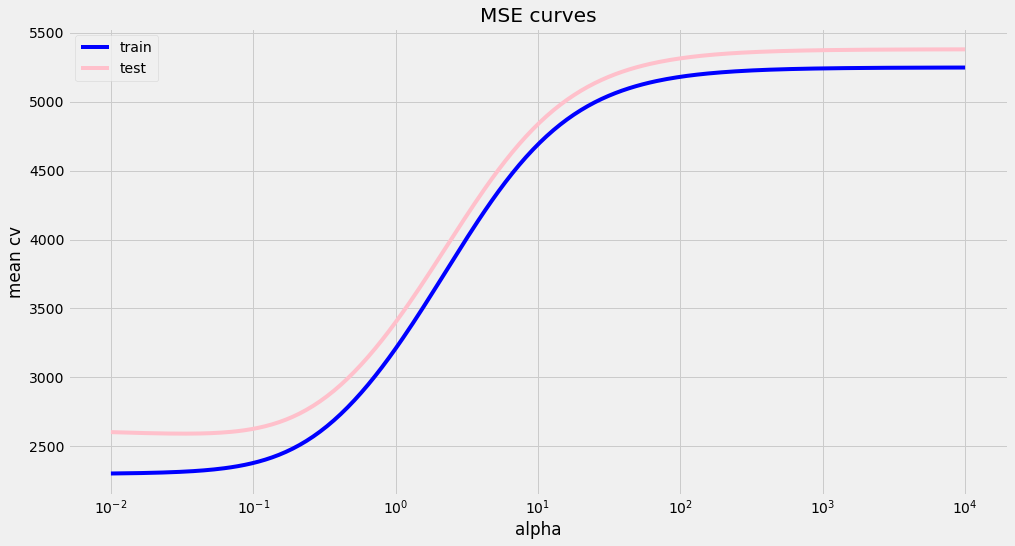

In [303]:
# fig,ax=plt.subplots(figsize=(15,10))
# ax.semilogx(ridge_alphas,ridge_cv_errors_train)
# ax.semilogx(ridge_alphas,ridge_cv_errors_test,label='test',color='pink')
# ax.set_xlabel('alpha')
# ax.set_ylabel('mean cv')
# ax.set_title('MSE curves')

# ridge_cv_errors_train.mean()
ridge_cv_errors_train.mean(), ridge_cv_errors_test.mean()

fig, ax = plt.subplots(figsize=(15,8))
ax.semilogx(ridge_alphas, ridge_cv_errors_train.mean(), label='train', color='blue')
ax.semilogx(ridge_alphas, ridge_cv_errors_test.mean(), label='test', color='pink')
ax.set_xlabel('alpha')
ax.set_ylabel('mean cv')
ax.set_title("MSE curves")
ax.legend()


In [308]:
ridge_cv_errors_test_min = ridge_cv_errors_test.mean()[ridge_cv_errors_test.mean() == ridge_cv_errors_test.mean().min()]
optimal_alpha = ridge_cv_errors_test_min.index
optimal_alpha

Float64Index([0.03206447226017888], dtype='float64')

In [309]:
ridge_cv_errors_test_min

0.032064    2592.046498
dtype: float64

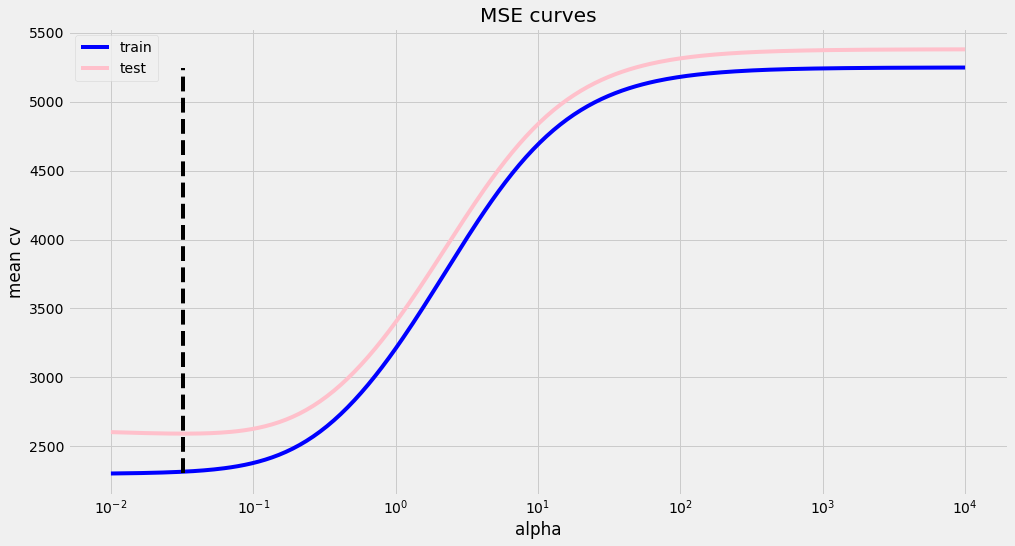

In [314]:
ax.plot([optimal_alpha,optimal_alpha],[ridge_cv_errors_train.mean().min(),ridge_cv_errors_train.mean().max()],color="black", linestyle="dashed")
fig

In [315]:
def ridge_coeff(X, y, alphas):
    nalphas = len(alphas)
    nfeatures = X.shape[1]
    coefs = np.zeros((nalphas, nfeatures))
    
    for i, alpha in enumerate(alphas):
        #Fit
        model = Ridge(alpha=alpha).fit(X,y)
        #get coeffiecientes
        coefs[i]=model.coef_
        
    return coefs
     

In [317]:
coefs_ridge=ridge_coeff(X_train, y_train, ridge_alphas)
coefs_ridge

array([[ 1.83848407e+01, -2.21455523e+02,  5.77954468e+02, ...,
         1.18707533e+02,  5.98695129e+02,  3.67966892e+01],
       [ 1.84724958e+01, -2.21149070e+02,  5.77566348e+02, ...,
         1.18075657e+02,  5.95210964e+02,  3.69828993e+01],
       [ 1.85623367e+01, -2.20831817e+02,  5.77151312e+02, ...,
         1.17469203e+02,  5.91758320e+02,  3.71777272e+01],
       ...,
       [ 2.72511864e-02,  6.50183589e-03,  7.31088923e-02, ...,
         5.07395683e-02,  7.02592783e-02,  4.50712981e-02],
       [ 2.57808686e-02,  6.15127498e-03,  6.91637733e-02, ...,
         4.80018821e-02,  6.64680304e-02,  4.26394236e-02],
       [ 2.43898550e-02,  5.81959687e-03,  6.54315023e-02, ...,
         4.54118650e-02,  6.28813182e-02,  4.03387255e-02]])

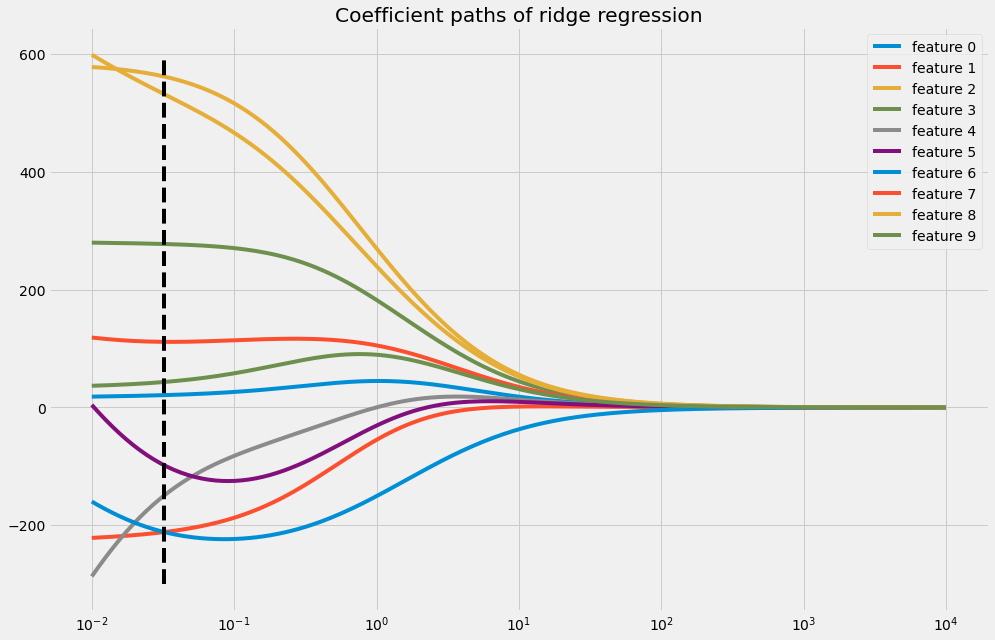

In [320]:
fig, ax = plt.subplots(figsize=(15,10))
i=0
while i < 10:
    ax.semilogx(ridge_alphas, coefs_ridge[:,i], label="feature {}".format(i))
    i+=1
    
ax.plot([optimal_alpha, optimal_alpha], [-300,600], color="black", linestyle="dashed")
ax.set_title("Coefficient paths of ridge regression")
ax.set_xlabel=('$\\alpha$')
ax.set_ylabel=('$\\beta$')
ax.legend(loc="upper right")


In [321]:
##LASSO
lasso_alphas = np.logspace(-10,10,num=500)
lasso_cv_errors_train,lasso_cv_errors_test = train_at_various_alphas(
    np.array(X_train),np.array(y_train),Lasso,lasso_alphas)                            


In [324]:
lasso_cv_errors_test_min = lasso_cv_errors_test.mean()[lasso_cv_errors_test.mean() == lasso_cv_errors_test.mean()]
lasso_optimal_alpha = lasso_cv_errors_test_min.index



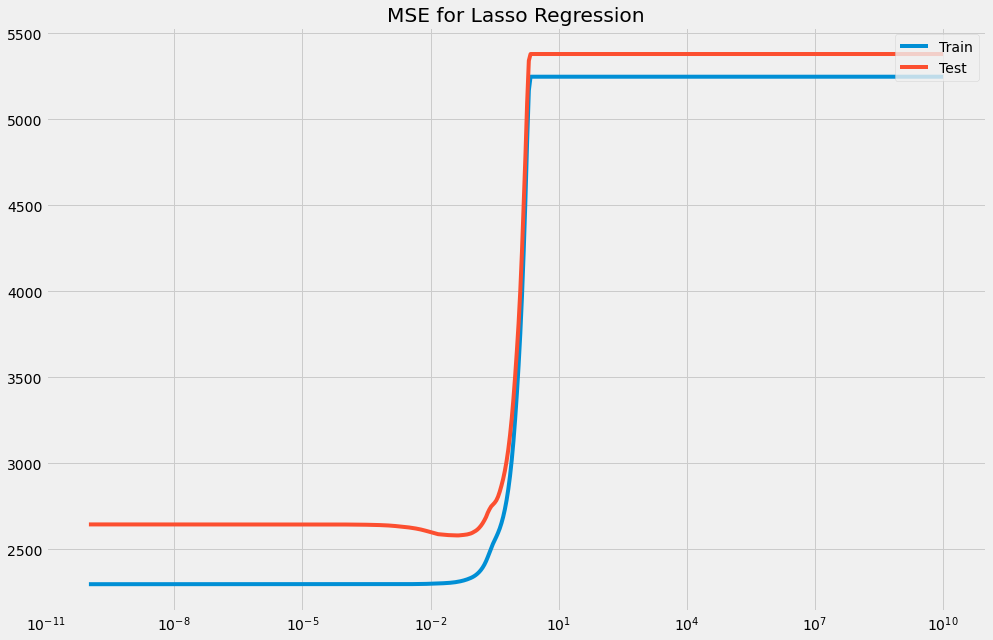

In [326]:
fig, ax = plt.subplots(figsize=(15,10))
i=0

ax.semilogx(lasso_alphas, lasso_cv_errors_train.mean(), label="Train")
ax.semilogx(lasso_alphas, lasso_cv_errors_test.mean(), label="Test")

ax.set_title("MSE for Lasso Regression")
ax.set_xlabel=('$\\alpha$')
ax.set_ylabel=('$\\Mean CV$')
ax.legend(loc="upper right")


In [327]:
def get_ridge_lasso_coeff(X,y,alphas,regression=Lasso):
    nalphas = len(alphas)
    nfeatures = X.shape[1]
    coefs=np.zeros((nalphas,nfeatures))
    
    for i,alpha in enumerate(alphas):
        model = regression(alpha=alpha).fit(X,y)
        coefs[i] = model.coef_ #obtener coeficientes
    
    return coefs

        

In [328]:
coefs_lasso = get_ridge_lasso_coeff(X_train,y_train,alphas = lasso_alphas,regression=Lasso)
coefs_lasso

array([[  15.54958541, -229.93636916,  582.19987408, ...,  160.24005626,
         768.48620799,   32.77490429],
       [  15.54958541, -229.93636915,  582.19987409, ...,  160.24005614,
         768.48620771,   32.77490429],
       [  15.54958541, -229.93636913,  582.19987409, ...,  160.240056  ,
         768.4862074 ,   32.77490429],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

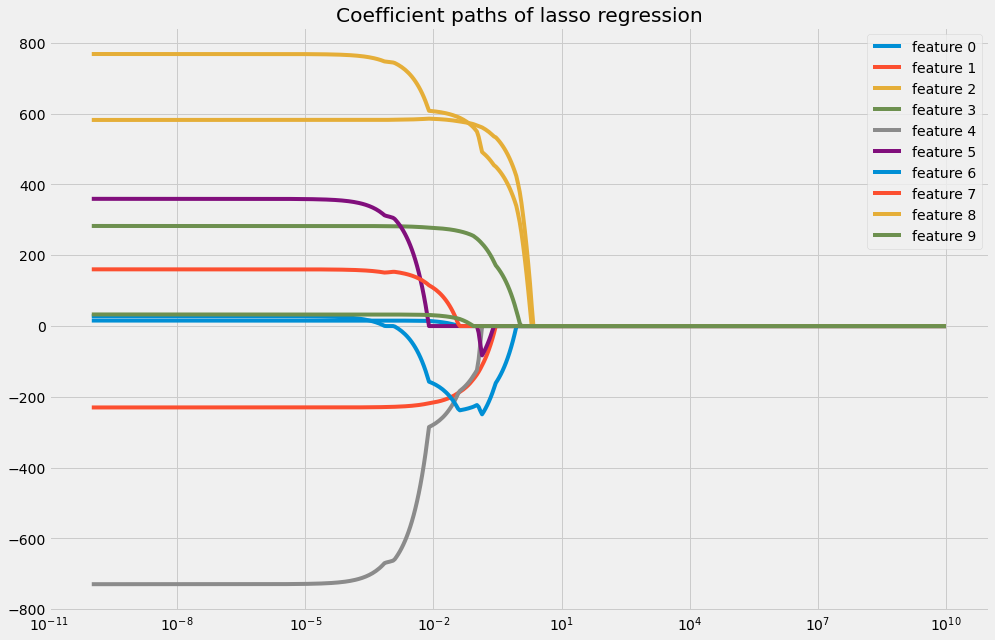

In [334]:
fig, ax = plt.subplots(figsize=(15,10))
i=0
while i < 10:
    ax.semilogx(lasso_alphas, coefs_lasso[:,i], label="feature {}".format(i))
    i+=1
    

ax.set_title("Coefficient paths of lasso regression")
ax.set_xlabel=('$\\alpha$')
ax.set_ylabel=('$\\beta$')
ax.legend(loc="upper right")
